In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load major_groups.csv

df = pd.read_csv("data/major_groups.csv", encoding = 'utf-8')

#Load public firms.csv
firms = pd.read_csv("data/public_firms.csv", encoding = 'utf-8')


In [3]:
df

#Industry chosen is Apparel and Accessory Stores.
#The corresponding code is 56 and the Index is 48

,major_group,description
0,1,Agricultural Production Crops
1,2,Agriculture production livestock and animal sp...
2,7,Agricultural Services
3,8,Forestry
4,9,Fishing hunting and trapping
...,...,...
78,94,Administration Of Human Resource Programs
79,95,Administration Of Environmental Quality And Ho...
80,96,Administration Of Economic Programs
81,97,National Security And International Affairs


In [4]:
#Part 1

# Filter rows where the first two digits of 'sic' are 56. There are only 4 digits so we can floor divide to get the first two digits
df_56 = firms[firms['sic'] // 100 == 56]

#Summary of the dataset
df_56.describe()

print(len(df_56))

1367


In [ ]:
df_56

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
5923,2484,1995,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,10.2500,14.520,14.866,735.269,1584.942,0.020218
5924,2484,1996,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.0000,73.560,29.013,704.731,1591.964,0.041169
5925,2484,1997,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.4370,157.394,56.515,775.077,1758.368,0.072915
5926,2484,1998,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,16.3125,106.952,47.783,941.635,1988.513,0.050745
5927,2484,1999,USA,BURLINGTON COAT FACTORY INVS,NaN,5651,13.8750,127.818,61.120,1046.047,2198.696,0.058429
...,...,...,...,...,...,...,...,...,...,...,...,...
203507,187575,2016,USA,TILLY'S INC,2012/05/04,5600,13.1900,78.994,11.410,290.506,568.952,0.039276
203508,187575,2017,USA,TILLY'S INC,2012/05/04,5600,14.7600,53.202,14.700,290.111,576.899,0.050670
203509,187575,2018,USA,TILLY'S INC,2012/05/04,5600,10.8600,68.160,24.943,293.168,598.478,0.085081
203510,187575,2019,USA,TILLY'S INC,2012/05/04,5600,12.2500,70.137,22.622,546.640,619.300,0.041384


In [5]:
#Part 1

#number of unique firm year
nfirmyear = len(df_56['fyear'].unique())
print(f"The number of unique firm year is: {nfirmyear}")

#number of unique company names
ncompany = len(df_56['conm'].unique())
print(f"The number of unique company names is: {ncompany}")

The number of unique firm year is: 27
The number of unique company names is: 105


In [7]:
#Part 1

#Group the companies by their company names
df_56_cnt = df_56.groupby('conm').nunique()
df_56_cnt

,gvkey,fyear,location,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
conm,,,,,,,,,,,
ABERCROMBIE & FITCH -CL A,1,26,1,1,1,25,26,26,26,26,26
AMERN EAGLE OUTFITTERS INC,1,26,1,1,1,26,26,26,26,26,26
ANN INC,1,21,1,1,1,21,21,21,21,21,21
ARO LIQUIDATION INC,1,16,1,0,1,14,16,16,16,16,16
ASCENA RETAIL GROUP INC,1,26,1,0,1,26,26,26,26,26,26
...,...,...,...,...,...,...,...,...,...,...,...
VICTORIAS SECRET AND CO,1,2,1,1,1,0,2,2,2,2,2
WALKING CO HOLDINGS INC,1,13,1,1,1,11,13,13,13,13,13
WET SEAL INC,1,20,1,0,1,20,20,20,20,20,20


In [8]:
#Part 1

#number of companies with full record
full_record = df_56_cnt[df_56_cnt['fyear'] == 27]
len(full_record)
print(f"The number of companies with full record is: {len(full_record)}")
full_record

The number of companies with full record is: 11


,gvkey,fyear,location,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
conm,,,,,,,,,,,
BATH & BODY WORKS INC,1,27,1,0,1,27,27,27,27,27,27
BUCKLE INC,1,27,1,1,1,27,27,27,27,27,27
CATO CORP -CL A,1,27,1,0,1,27,27,27,27,27,27
DESTINATION XL GROUP INC,1,27,1,1,1,26,25,27,27,27,27
FOOT LOCKER INC,1,27,1,0,1,27,27,24,27,27,27
GAP INC,1,27,1,0,1,27,26,26,27,27,27
GENESCO INC,1,27,1,0,1,27,27,27,27,27,27
NORDSTROM INC,1,27,1,0,1,27,27,27,27,27,27
ROSS STORES INC,1,27,1,0,1,27,27,27,27,27,27


In [9]:
df_56['fyear'].unique()

full_record

,gvkey,fyear,location,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
conm,,,,,,,,,,,
BATH & BODY WORKS INC,1,27,1,0,1,27,27,27,27,27,27
BUCKLE INC,1,27,1,1,1,27,27,27,27,27,27
CATO CORP -CL A,1,27,1,0,1,27,27,27,27,27,27
DESTINATION XL GROUP INC,1,27,1,1,1,26,25,27,27,27,27
FOOT LOCKER INC,1,27,1,0,1,27,27,24,27,27,27
GAP INC,1,27,1,0,1,27,26,26,27,27,27
GENESCO INC,1,27,1,0,1,27,27,27,27,27,27
NORDSTROM INC,1,27,1,0,1,27,27,27,27,27,27
ROSS STORES INC,1,27,1,0,1,27,27,27,27,27,27


In [10]:
#Part 1B Question 1 and 2

# stock price column name: prcc_c
# sales column name: sale
# geographical distribution column name: location)

#top 10 firm with highest stock price in 2020
top_10_stock_price_2020 = df_56[df_56['fyear'] ==2020].nlargest(10, 'prcc_c')
top_10_stock_price_2020
print(f"top 10 stock price is: {top_10_stock_price_2020['conm'].unique()}")


#top 10 firm with highest sales in all of history

df_56_sum = df_56.groupby('conm')['sale'].sum()
df_56_sum = df_56_sum.reset_index() #converts series into dataframe
top_10_sales = df_56_sum.nlargest(10,"sale")
print(f"top 10 sales is: {top_10_sales['conm'].unique()}")




top 10 stock price is: ['BURLINGTON STORES INC' 'ROSS STORES INC' 'TJX COS INC (THE)'
 'CHILDRENS PLACE INC' 'CITI TRENDS INC' 'BOOT BARN HOLDINGS INC'
 'FOOT LOCKER INC' 'SHOE CARNIVAL INC' 'BATH & BODY WORKS INC'
 'ZUMIEZ INC']
top 10 sales is: ['TJX COS INC (THE)' 'GAP INC' 'BATH & BODY WORKS INC' 'NORDSTROM INC'
 'ROSS STORES INC' 'FOOT LOCKER INC' 'ABERCROMBIE & FITCH  -CL A'
 'ASCENA RETAIL GROUP INC' 'AMERN EAGLE OUTFITTERS INC'
 'DESIGNER BRANDS INC']


In [11]:
top_10_stock_price_2020

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
68733,18675,2020,USA,BURLINGTON STORES INC,2013/10/02,5600,261.55,1380.276,-216.499,6781.092,5763.980,-0.031927
33774,9248,2020,USA,ROSS STORES INC,NaN,5651,122.81,4819.293,85.382,12717.867,12531.565,0.006714
43543,11672,2020,USA,TJX COS INC (THE),NaN,5651,68.29,10469.570,90.470,30813.555,32136.962,0.002936
141569,65430,2020,USA,CHILDRENS PLACE INC,1997/09/19,5600,50.10,63.548,-140.365,1140.127,1522.598,-0.123113
184708,163051,2020,USA,CITI TRENDS INC,2005/05/18,5651,49.68,123.177,23.978,494.593,783.294,0.048480
76291,21898,2020,USA,BOOT BARN HOLDINGS INC,2014/10/30,5661,43.36,73.148,59.386,933.581,893.491,0.063611
43244,11584,2020,USA,FOOT LOCKER INC,NaN,5661,40.44,1680.000,323.000,7043.000,7548.000,0.045861
94181,27938,2020,USA,SHOE CARNIVAL INC,1993/03/16,5661,39.18,106.532,15.991,642.747,976.765,0.024879
23067,6733,2020,USA,BATH & BODY WORKS INC,NaN,5600,37.19,3903.000,844.000,11571.000,11847.000,0.072941
184613,162988,2020,USA,ZUMIEZ INC,2005/05/06,5651,36.78,73.622,76.227,998.364,990.652,0.076352


In [12]:
top_10_sales

,conm,sale
92,TJX COS INC (THE),531354.915
54,GAP INC,362527.300
8,BATH & BODY WORKS INC,274942.175
74,NORDSTROM INC,248159.506
80,ROSS STORES INC,188529.105
47,FOOT LOCKER INC,167706.000
0,ABERCROMBIE & FITCH -CL A,67874.646
4,ASCENA RETAIL GROUP INC,65366.513
1,AMERN EAGLE OUTFITTERS INC,63138.850
33,DESIGNER BRANDS INC,57096.129


In [13]:
#Part 1B Question 3

#How many firms in each location
top_10_location = df_56.groupby(['location','conm']).count()
top_10_location

unique_companies_per_location = df_56.groupby('location')['conm'].nunique()
unique_companies_per_location

location
CAN      1
USA    104
Name: conm, dtype: int64

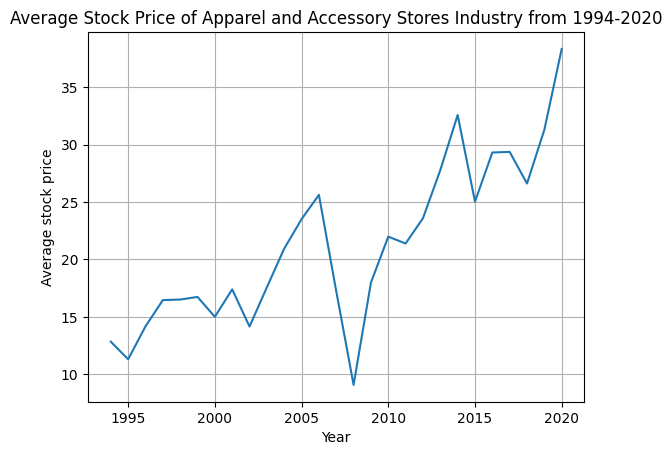

In [14]:
#Part 1B Question 4

pc = df_56.groupby('fyear').prcc_c.mean()

#Plot the chart
plt.plot(pc)
plt.title("Average Stock Price of Apparel and Accessory Stores Industry from 1994-2020")
plt.xlabel("Year")
plt.ylabel("Average stock price")
plt.grid(True)
plt.show()

In [15]:
#Part 1B Question 5

#filter 2007 observations
df_2007 = df_56[df_56['fyear']==2007][['conm','prcc_c']].rename(columns={'prcc_c':'prcc_c_2007'})
df_2007

#filter 2008 observations
df_2008 = df_56[df_56['fyear']==2008][['conm','prcc_c']].rename(columns={'prcc_c':'prcc_c_2008'})
df_2008

#Join both the dataset
df_2007_2008 = df_2007.merge(df_2008, on = 'conm', how= 'inner')
df_2007_2008

#Remove all the null values
df_2007_2008 = df_2007_2008.dropna()
df_2007_2008

#Calculate the percentage change from 2007 to 2008 and sort to reflect the largest change
df_2007_2008['diff'] = ((df_2007_2008['prcc_c_2008'] - df_2007_2008['prcc_c_2007'] ) / df_2007_2008['prcc_c_2007'])*100

df_2007_2008.sort_values(by = "diff")


,conm,prcc_c_2007,prcc_c_2008,diff
44,EDDIE BAUER HOLDINGS INC,6.35,0.51,-91.968504
12,DESTINATION XL GROUP INC,5.18,0.52,-89.961390
22,PACIFIC SUNWEAR CALIF INC,14.11,1.59,-88.731396
36,TWEEN BRANDS INC,26.48,4.32,-83.685801
26,TALBOTS INC,11.82,2.39,-79.780034
1,CACHE INC,9.34,2.02,-78.372591
13,ANN INC,25.56,5.77,-77.425665
18,STEIN MART INC,4.74,1.13,-76.160338
39,BAKERS FOOTWEAR GROUP INC,2.30,0.57,-75.217391
34,J CREW GROUP INC,48.21,12.20,-74.694047


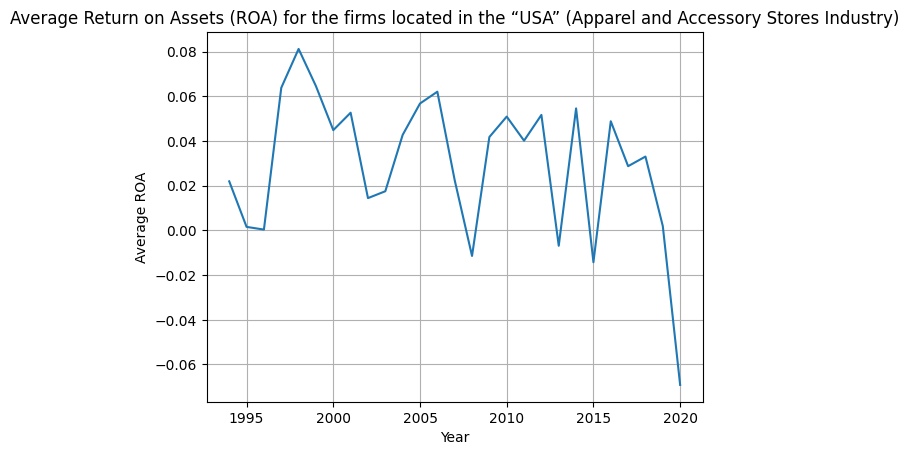

In [16]:
#Part 1B Question 6

#Drop the missing values from roa column
df_roa = df_56.dropna(subset=['roa'])

#Only select USA location for plotting
df_roa_USA = df_roa[df_roa['location'] == 'USA']

#Get the mean for plotting
df_roa_plot = df_roa_USA.groupby('fyear').roa.mean()

#Plot the chart
plt.plot(df_roa_plot)
plt.title("Average Return on Assets (ROA) for the firms located in the “USA” (Apparel and Accessory Stores Industry)")
plt.xlabel("Year")
plt.ylabel("Average ROA")
plt.grid(True)
plt.show()

In [19]:
#Part 2C

# 1. Convert all words to lowercase.
# 2. Remove punctuations.
# 3. Remove stop words based on the list of English stop words in NLTK

import string
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

translator = str.maketrans('', '', string.punctuation)
sw = stopwords.words('english')


In [233]:
df = pd.read_csv("data/2020_10K_item1_full.csv", encoding = 'utf-8')
df = df.drop_duplicates()
df

,cik,year,name,item_1_text,gvkey
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
12,1593204,2020,Adaiah Distribution Inc,General Adaiah Distribution Inc. was incorpora...,23706
...,...,...,...,...,...
5476,740664,2020,R F INDUSTRIES LTD,"General RF Industries, Ltd. (together with sub...",2829
5477,1074828,2020,"KNOW LABS, INC.","BACKGROUND AND CAPITAL STRUCTURE Know Labs, In...",166430
5478,40570,2020,GEE Group Inc.,"General GEE Group Inc. (the Company , us , ...",5050
5479,1341726,2020,"GULFSLOPE ENERGY, INC.","General GulfSlope Energy, Inc. is an independe...",175595


In [234]:
#code from lecture
def clean_text(text):
    # lower case
    clean_text = text.lower()

    # remove punctuation
    clean_text = clean_text.translate(translator)

    # remove stopwords
    clean_words = [w for w in clean_text.split() if w not in sw]

    return ' '.join(clean_words)

df['item_1_clean'] = df['item_1_text'].apply(clean_text)

In [235]:
#Part 2D

#D-1
#get unique company key
df_56_com = df_56['gvkey'].unique()
df_56_com

array([  2484,   2595,   2818,   2938,   3087,   3122,   3824,   4072,
         4218,   4469,   4892,   4990,   5109,   6400,   6733,   7272,
         7922,   8390,   8504,   9248,   9305,  10969,  11584,  11672,
        11866,  12221,  13292,  13338,  13339,  13381,  13842,  14083,
        15346,  16580,  17911,  18675,  20895,  21828,  21898,  22612,
        23973,  24171,  24334,  24545,  24621,  25020,  25108,  25167,
        25186,  25234,  25353,  25357,  27773,  27936,  27937,  27938,
        27981,  29105,  29150,  29264,  29854,  30059,  30435,  30699,
        31829,  32194,  39310,  61397,  61445,  61868,  62667,  63621,
        63643,  63874,  64304,  64820,  65430,  65484,  65592,  66526,
       116104, 119474, 120716, 122778, 124176, 125275, 147661, 148224,
       148372, 149057, 154754, 160571, 162988, 163051, 163601, 164058,
       164103, 179342, 180227, 183570, 184323, 185190, 185227, 187041,
       187575])

In [236]:
#use the company key above to filter the main dataframe
df_56_word = df[df['gvkey'].isin(df_56_com)]
df_56_word

,cik,year,name,item_1_text,gvkey,item_1_clean
1278,877422,2020,SpartanNash Co,Overview SpartanNash Company (together with it...,63874,overview spartannash company together subsidia...
2680,919012,2020,AMERICAN EAGLE OUTFITTERS INC,"General American Eagle Outfitters, Inc. ( the...",30059,general american eagle outfitters inc company ...
2868,1579298,2020,"Burlington Stores, Inc.",Overview We are a nationally recognized retail...,18675,overview nationally recognized retailer highqu...
2997,897429,2020,"CHICO'S FAS, INC.","Overview Founded in 1983, Chico s FAS, Inc.1, ...",27981,overview founded 1983 chico fas inc1 leading o...
3110,1318008,2020,Zumiez Inc,"Zumiez Inc., including its wholly-owned subsid...",162988,zumiez inc including whollyowned subsidiaries ...
3174,883943,2020,CHRISTOPHER & BANKS CORP,Overview Christopher & Banks Corporation is a ...,25108,overview christopher banks corporation nationa...
3216,1483510,2020,"EXPRESS, INC.","In this section, Express , we , us , the C...",184323,section express us company refer express inc c...
3225,39911,2020,GAP INC,"General The Gap, Inc. (Gap Inc., the Company,...",4990,general gap inc gap inc company incorporated s...
3281,1041859,2020,"Childrens Place, Inc.","As used in this Annual Report on Form 10-K, re...",65430,used annual report form 10k references company...
3306,813298,2020,"DESTINATION XL GROUP, INC.","Destination XL Group, Inc., together with its ...",13381,destination xl group inc together subsidiaries...


In [237]:
#D-2
#code from lecture
from collections import Counter

#word count function
def get_keywords_wc(text):
    c = Counter(text.split())
    words = []
    for pair in c.most_common(10):
        words.append(pair[0])
    return ' '.join(words)

In [238]:
#get word count using get_keywords_wc
df_56_word['keyword_clean_wc'] = df_56_word.item_1_clean.apply(get_keywords_wc)
df_56_word

/var/folders/_b/v51rk4qj7hxcq50ftvsf39540000gn/T/ipykernel_52426/2379778571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_56_word['keyword_clean_wc'] = df_56_word.item_1_clean.apply(get_keywords_wc)


,cik,year,name,item_1_text,gvkey,item_1_clean,keyword_clean_wc
1278,877422,2020,SpartanNash Co,Overview SpartanNash Company (together with it...,63874,overview spartannash company together subsidia...,company products retail distribution stores fo...
2680,919012,2020,AMERICAN EAGLE OUTFITTERS INC,"General American Eagle Outfitters, Inc. ( the...",30059,general american eagle outfitters inc company ...,stores served brand 1 officer president chief ...
2868,1579298,2020,"Burlington Stores, Inc.",Overview We are a nationally recognized retail...,18675,overview nationally recognized retailer highqu...,stores fiscal merchandise store believe inform...
2997,897429,2020,"CHICO'S FAS, INC.","Overview Founded in 1983, Chico s FAS, Inc.1, ...",27981,overview founded 1983 chico fas inc1 leading o...,merchandise brands customers fiscal stores cus...
3110,1318008,2020,Zumiez Inc,"Zumiez Inc., including its wholly-owned subsid...",162988,zumiez inc including whollyowned subsidiaries ...,stores customers believe store merchandise us ...
3174,883943,2020,CHRISTOPHER & BANKS CORP,Overview Christopher & Banks Corporation is a ...,25108,overview christopher banks corporation nationa...,merchandise stores customer fiscal customers b...
3216,1483510,2020,"EXPRESS, INC.","In this section, Express , we , us , the C...",184323,section express us company refer express inc c...,customers merchandise express stores new appro...
3225,39911,2020,GAP INC,"General The Gap, Inc. (Gap Inc., the Company,...",4990,general gap inc gap inc company incorporated s...,president gap vice executive stores brand appa...
3281,1041859,2020,"Childrens Place, Inc.","As used in this Annual Report on Form 10-K, re...",65430,used annual report form 10k references company...,children stores place us store company fiscal ...
3306,813298,2020,"DESTINATION XL GROUP, INC.","Destination XL Group, Inc., together with its ...",13381,destination xl group inc together subsidiaries...,stores store dxl fiscal customers casual merch...


In [239]:
#code from lecture
def get_keywords_tfidf(document_list):
    '''
    Input: A list of documents (text)
    Output: The corresponding top 10 keywords for each document based on tf-idf values
    '''

    # Step 1: Create the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Step 2: Calculate the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(document_list)

    # Step 3: Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Step 4: Extract top 10 keywords for each text
    top_keywords = []
    for i in range(len(document_list)):

        if i %100 == 0:
            print(f'Processing the {i}/{len(document_list)} document.')
        
        feature_index = tfidf_matrix[i, :].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]]))
    
    return top_keywords

In [241]:
#get tf- idf using get_keywords_tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
keywords = get_keywords_tfidf(df_56_word.item_1_clean.tolist())
df_56_word['tfidf'] = keywords
df_56_word

Processing the 0/30 document.


/var/folders/_b/v51rk4qj7hxcq50ftvsf39540000gn/T/ipykernel_52426/3610273905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_56_word['tfidf'] = keywords


,cik,year,name,item_1_text,gvkey,item_1_clean,keyword_clean_wc,tl,tfidf
1278,877422,2020,SpartanNash Co,Overview SpartanNash Company (together with it...,63874,overview spartannash company together subsidia...,company products retail distribution stores fo...,company military deca food commissaries grocer...,company military deca food commissaries grocer...
2680,919012,2020,AMERICAN EAGLE OUTFITTERS INC,"General American Eagle Outfitters, Inc. ( the...",30059,general american eagle outfitters inc company ...,stores served brand 1 officer president chief ...,aerie served eagle ae officer chief stores pre...,aerie served eagle ae officer chief stores pre...
2868,1579298,2020,"Burlington Stores, Inc.",Overview We are a nationally recognized retail...,18675,overview nationally recognized retailer highqu...,stores fiscal merchandise store believe inform...,stores burlington fiscal merchandise store bel...,stores burlington fiscal merchandise store bel...
2997,897429,2020,"CHICO'S FAS, INC.","Overview Founded in 1983, Chico s FAS, Inc.1, ...",27981,overview founded 1983 chico fas inc1 leading o...,merchandise brands customers fiscal stores cus...,chico whbm soma brands merchandise customers f...,chico whbm soma brands merchandise customers f...
3110,1318008,2020,Zumiez Inc,"Zumiez Inc., including its wholly-owned subsid...",162988,zumiez inc including whollyowned subsidiaries ...,stores customers believe store merchandise us ...,lifestyles stores believe customers culture st...,lifestyles stores believe customers culture st...
3174,883943,2020,CHRISTOPHER & BANKS CORP,Overview Christopher & Banks Corporation is a ...,25108,overview christopher banks corporation nationa...,merchandise stores customer fiscal customers b...,banks christopher merchandise stores cj custom...,banks christopher merchandise stores cj custom...
3216,1483510,2020,"EXPRESS, INC.","In this section, Express , we , us , the C...",184323,section express us company refer express inc c...,customers merchandise express stores new appro...,express merchandise customers stores new laws ...,express merchandise customers stores new laws ...
3225,39911,2020,GAP INC,"General The Gap, Inc. (Gap Inc., the Company,...",4990,general gap inc gap inc company incorporated s...,president gap vice executive stores brand appa...,gap president vice athleta banana navy executi...,gap president vice athleta banana navy executi...
3281,1041859,2020,"Childrens Place, Inc.","As used in this Annual Report on Form 10-K, re...",65430,used annual report form 10k references company...,children stores place us store company fiscal ...,children gymboree place stores factories fisca...,children gymboree place stores factories fisca...
3306,813298,2020,"DESTINATION XL GROUP, INC.","Destination XL Group, Inc., together with its ...",13381,destination xl group inc together subsidiaries...,stores store dxl fiscal customers casual merch...,dxl male xl stores store casual big fiscal cus...,dxl male xl stores store casual big fiscal cus...


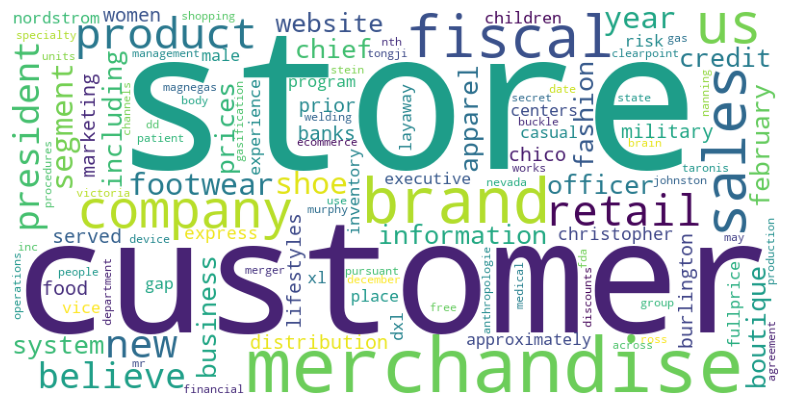

In [242]:
#D-3 word cloud
#code from lecture
from wordcloud import WordCloud
text1 = ' '.join(df_56_word['keyword_clean_wc'].tolist())

#word cloud for word_count
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(text1) # note that text is a string, not a list
plt.figure(figsize=(10,5))
plt.imshow(wordcloud1)
plt.savefig('keyword_wc.png') # save as PNG file
plt.axis('off')

plt.show()

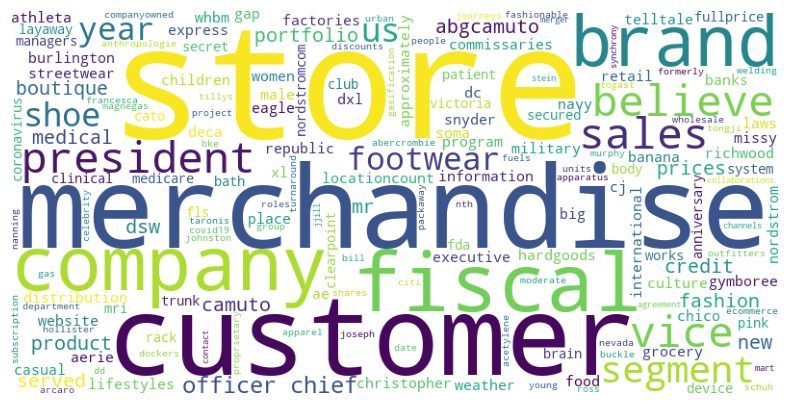

In [243]:
#word cloud for tf-idf
text2 = ' '.join(df_56_word['tfidf'].tolist())
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(text2) # note that text is a string, not a list

plt.figure(figsize=(10,5))
plt.imshow(wordcloud2)
plt.savefig('tfidf.png') # save as PNG file
plt.axis('off')

plt.show()

In [244]:
#Part 2E rain a word2vec model and analyze word similarities
#code from lecture
from gensim.models import Word2Vec
sent = [row.split() for row in df['item_1_clean']]

#train and save model
model = Word2Vec(sent, min_count=1, vector_size=50, workers=3, window=3, sg = 1)
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

In [245]:
from DocumentSimilarity import DocumentSimilarity
d = DocumentSimilarity(model = model, gvkeys=df_56_word['gvkey'], conm = df_56_word['name'],
                       keywordslist = df_56_word['tfidf'])

In [246]:
#top5 similar word
model.wv.most_similar(positive='footwear', topn=5)

[('apparel', 0.9550002217292786),
 ('outerwear', 0.8890790343284607),
 ('clothing', 0.8635386228561401),
 ('shoes', 0.8574903011322021),
 ('sportswear', 0.8462600708007812)]

In [248]:
model.wv.most_similar(positive='store', topn=5)

[('stores', 0.8738605380058289),
 ('restaurant', 0.8545236587524414),
 ('inrestaurant', 0.8387573957443237),
 ('instore', 0.8363032937049866),
 ('popup', 0.8332494497299194)]

In [249]:
model.wv.most_similar(positive='brand', topn=5)

[('brands', 0.9274031519889832),
 ('widelyrecognized', 0.8536772727966309),
 ('lee®', 0.8514106273651123),
 ('guess', 0.8509753346443176),
 ('bergio', 0.841139554977417)]

In [253]:
unique_company =df_56_word[['gvkey','name']].drop_duplicates()
unique_company

,gvkey,name
1278,63874,SpartanNash Co
2680,30059,AMERICAN EAGLE OUTFITTERS INC
2868,18675,"Burlington Stores, Inc."
2997,27981,"CHICO'S FAS, INC."
3110,162988,Zumiez Inc
3174,25108,CHRISTOPHER & BANKS CORP
3216,184323,"EXPRESS, INC."
3225,4990,GAP INC
3281,65430,"Childrens Place, Inc."
3306,13381,"DESTINATION XL GROUP, INC."


In [223]:
#inspired by chatgpt - calcuate market share by fyear
df_56['Market_Share'] = df_56.groupby('fyear')['sale'].transform(lambda x: x / x.sum())
df_56[df_56['gvkey'] == 4990]

/var/folders/_b/v51rk4qj7hxcq50ftvsf39540000gn/T/ipykernel_52426/2195832630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_56['Market_Share'] = df_56.groupby('fyear')['sale'].transform(lambda x: x / x.sum())


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,Market_Share
15929,4990,1994,USA,GAP INC,NaN,5651,30.500,414.487,320.240,2004.244,3722.940,0.159781,0.079364
15930,4990,1995,USA,GAP INC,NaN,5651,42.000,579.566,354.039,2343.068,4395.253,0.151101,0.076855
15931,4990,1996,USA,GAP INC,NaN,5651,30.125,485.644,452.859,2626.927,5284.381,0.172391,0.083873
15932,4990,1997,USA,GAP INC,NaN,5651,35.437,913.169,533.901,3337.502,6507.824,0.159970,0.095615
15933,4990,1998,USA,GAP INC,NaN,5651,56.125,565.253,824.539,3963.919,9054.462,0.208011,0.125410
15934,4990,1999,USA,GAP INC,NaN,5651,46.000,450.352,1127.065,5188.756,11635.398,0.217213,0.150811
15935,4990,2000,USA,GAP INC,NaN,5651,25.500,408.794,877.497,7012.908,13673.460,0.125126,0.158672
15936,4990,2001,USA,GAP INC,NaN,5651,13.940,1035.749,-7.764,7682.823,13847.873,-0.001011,0.165533
15937,4990,2002,USA,GAP INC,NaN,5651,15.520,3388.514,477.457,9902.004,14454.709,0.048218,0.162270
15938,4990,2003,USA,GAP INC,NaN,5651,23.210,3334.000,1030.000,10343.000,15854.000,0.099584,0.166399


In [254]:
firm = 4990
ls = d.most_similar(firm = firm, topn = 5)
data = []
data.append(firm)

In [256]:
for l in ls:
    data.append(l[0])
data

[4990, 30059, 27938, 63643, 25234, 5109]

In [257]:
similarity = df_56[df_56['gvkey'].isin(data)]

In [260]:
similarity

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,Market_Share
15929,4990,1994,USA,GAP INC,NaN,5651,30.500,414.487,320.240,2004.244,3722.940,0.159781,0.079364
15930,4990,1995,USA,GAP INC,NaN,5651,42.000,579.566,354.039,2343.068,4395.253,0.151101,0.076855
15931,4990,1996,USA,GAP INC,NaN,5651,30.125,485.644,452.859,2626.927,5284.381,0.172391,0.083873
15932,4990,1997,USA,GAP INC,NaN,5651,35.437,913.169,533.901,3337.502,6507.824,0.159970,0.095615
15933,4990,1998,USA,GAP INC,NaN,5651,56.125,565.253,824.539,3963.919,9054.462,0.208011,0.125410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132224,63643,2016,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,12.000,547.189,3.956,2295.757,3326.740,0.001723,0.021907
132225,63643,2017,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,17.430,675.558,7.094,2325.692,3492.690,0.003050,0.021929
132226,63643,2018,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,20.050,723.135,74.541,2385.593,3590.109,0.031246,0.021867
132227,63643,2019,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,17.290,671.267,39.358,3549.665,3623.073,0.011088,0.021331


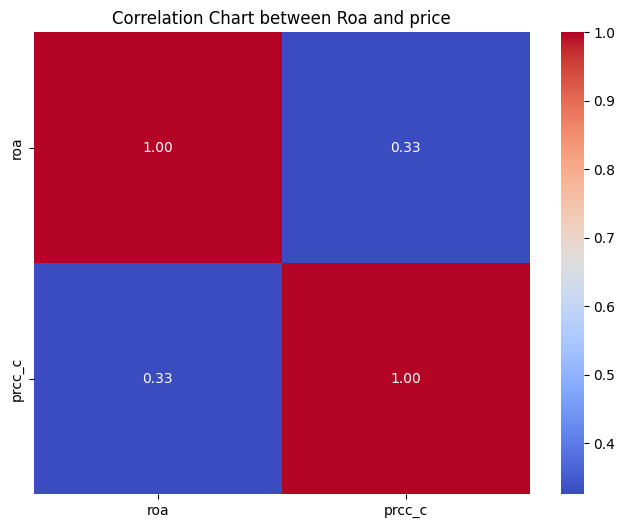

In [263]:
import seaborn as sns

# Assuming you have a DataFrame df with columns "Roa" and "Proc"
# Replace df with your actual DataFrame name and column names as needed

# Calculate the correlation matrix
correlation_matrix = similarity[['roa', 'prcc_c']].corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Chart between Roa and price')
plt.savefig('cor_price_roa.png')
# Display the plot
plt.show()

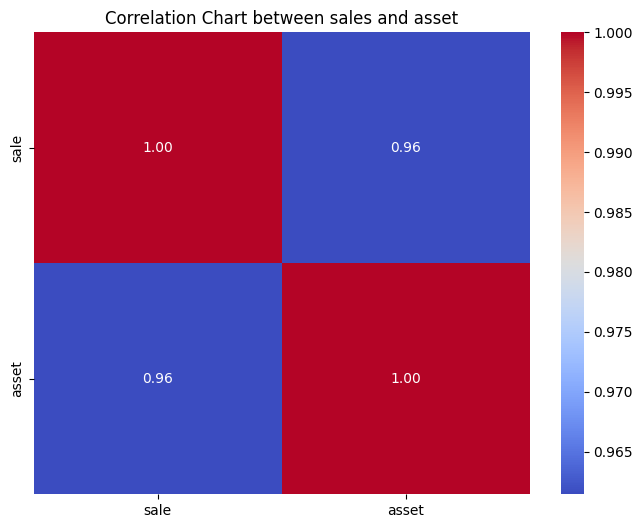

In [264]:
correlation_matrix = similarity[['sale','asset']].corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Chart between sales and asset')
plt.savefig('cor_asset_sales.png')
# Display the plot
plt.show()

In [226]:
#inspired by chatgpt - calculate price change by stocks.
similarity['price_move'] = similarity.groupby('gvkey')['prcc_c'].pct_change()*100
similarity[similarity['gvkey']==63643]

/var/folders/_b/v51rk4qj7hxcq50ftvsf39540000gn/T/ipykernel_52426/4264984879.py:1: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  similarity['price_move'] = similarity.groupby('gvkey')['prcc_c'].pct_change()*100
/var/folders/_b/v51rk4qj7hxcq50ftvsf39540000gn/T/ipykernel_52426/4264984879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similarity['price_move'] = similarity.groupby('gvkey')['prcc_c'].pct_change()*100


,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,Market_Share,price_move
132203,63643,1995,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,NaN,0.874,14.298,87.693,235.659,0.163046,0.004121,NaN
132204,63643,1996,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,16.5000,1.945,24.674,105.761,335.372,0.233300,0.005323,NaN
132205,63643,1997,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,31.2500,42.667,48.322,183.238,521.617,0.263712,0.007664,89.393939
132206,63643,1998,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,70.7500,163.564,102.062,319.161,815.804,0.319782,0.011299,126.400000
132207,63643,1999,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,26.6875,147.908,149.604,458.166,1042.056,0.326528,0.013506,-62.279152
132208,63643,2000,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,20.0000,137.581,158.133,587.516,1237.604,0.269155,0.014362,-25.058548
132209,63643,2001,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,26.5300,167.664,168.672,770.546,1364.853,0.218899,0.016315,32.650000
132210,63643,2002,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,20.4600,391.035,194.935,994.822,1595.757,0.195950,0.017914,-22.879759
132211,63643,2003,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,24.7100,56.373,204.830,1383.229,1707.810,0.148081,0.017925,20.772239
132212,63643,2004,USA,ABERCROMBIE & FITCH -CL A,1996/09/25,5651,46.9500,350.368,216.376,1347.701,2021.253,0.160552,0.019641,90.004047


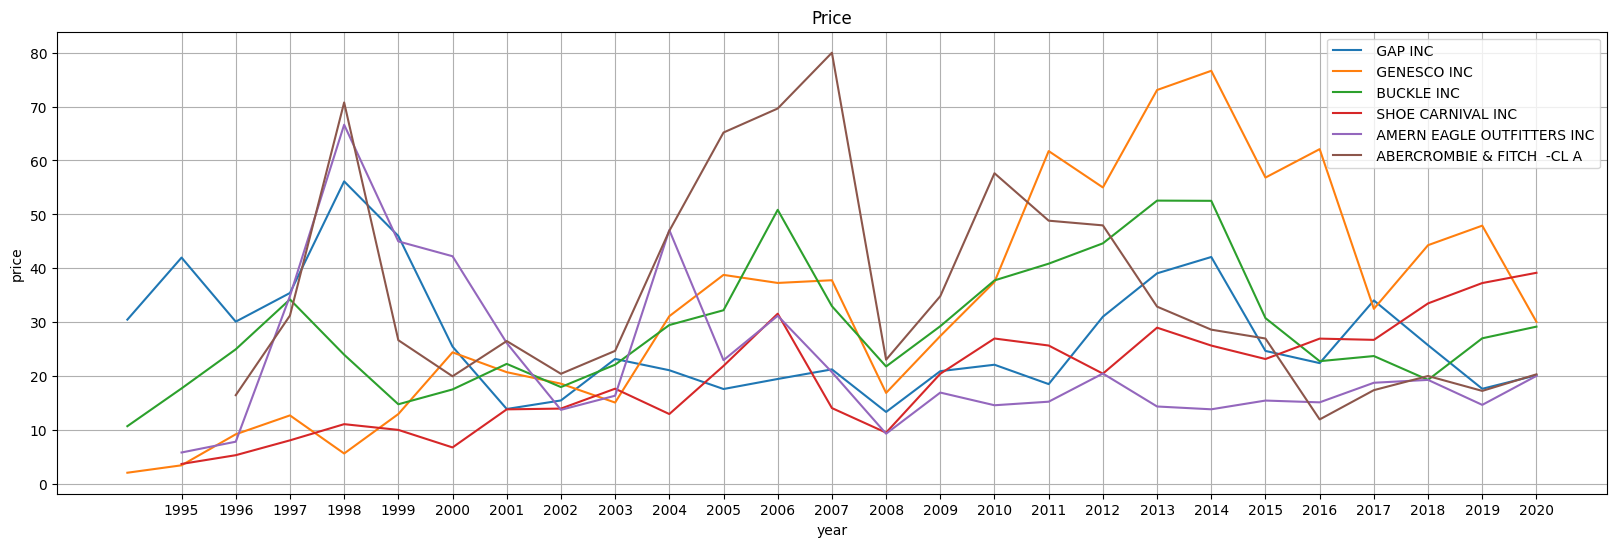

In [275]:
plt.figure(figsize=(20, 6))

for gvkey, group_df in similarity.groupby('gvkey'):
    company_name = group_df['conm'].iloc[0]
    plt.plot(group_df['fyear'],group_df['prcc_c'], label = f' {company_name}')

plt.xticks(group_df['fyear'])
plt.grid(True)
plt.xlabel('year')
plt.ylabel('price')
plt.title('Price')
plt.legend()
plt.savefig('price_linechart.png')
plt.show()

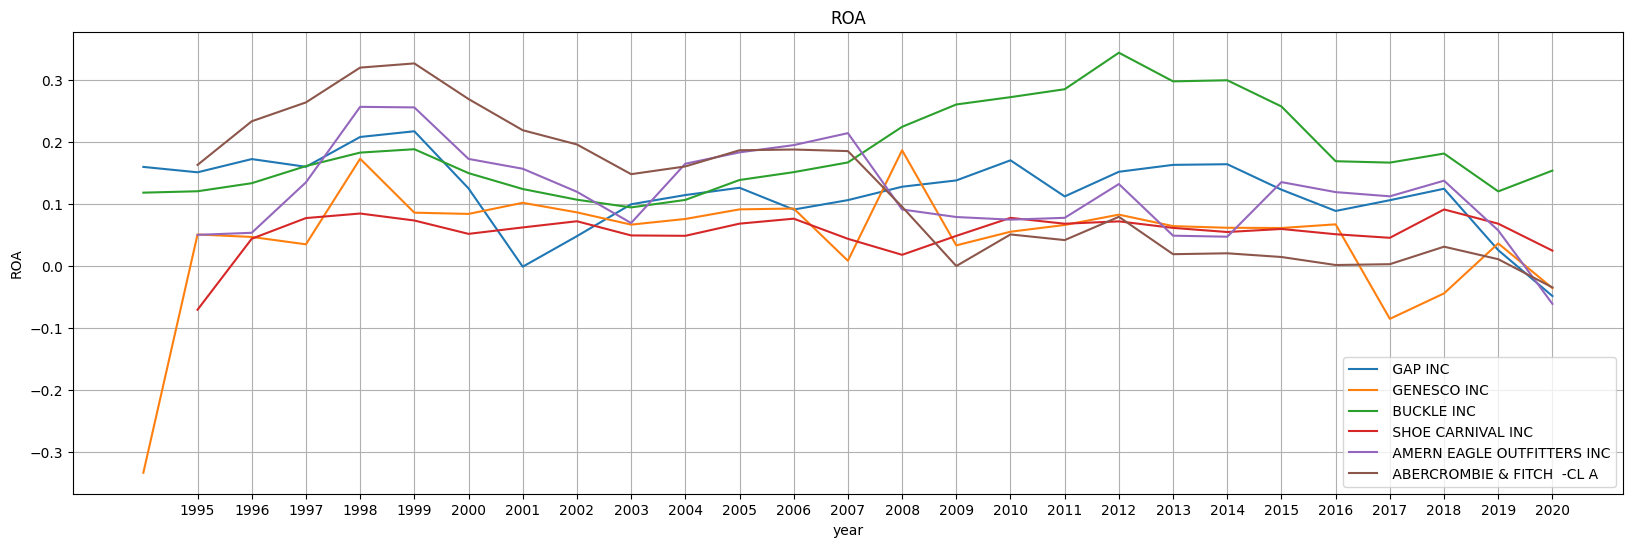

In [290]:
plt.figure(figsize=(20, 6))

for gvkey, group_df in similarity.groupby('gvkey'):
    company_name = group_df['conm'].iloc[0]
    plt.plot(group_df['fyear'],group_df['roa'], label = f' {company_name}')

plt.xticks(group_df['fyear'])
plt.grid(True)
plt.xlabel('year')
plt.ylabel('ROA')
plt.title('ROA')
plt.legend()
plt.savefig('roa_linechart.png')


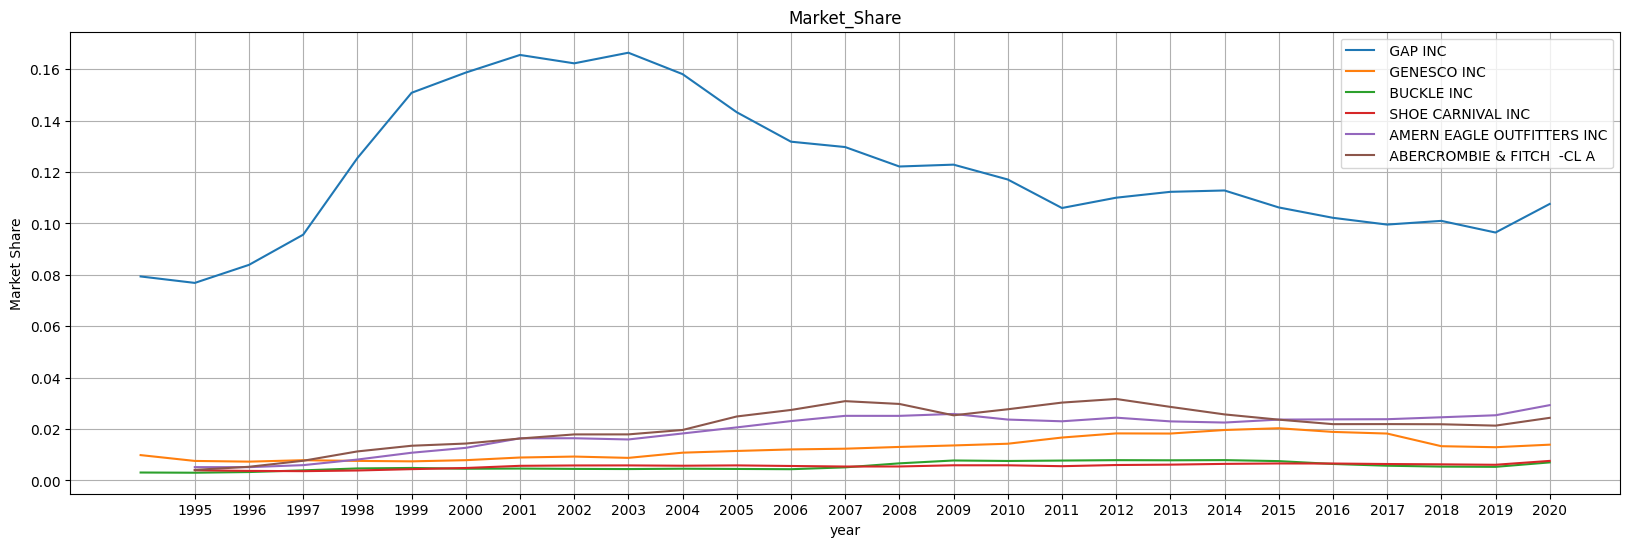

In [289]:
plt.figure(figsize=(20, 6))

for gvkey, group_df in similarity.groupby('gvkey'):
    company_name = group_df['conm'].iloc[0]
    plt.plot(group_df['fyear'],group_df['Market_Share'], label = f' {company_name}')

plt.xticks(group_df['fyear'])
plt.grid(True)
plt.xlabel('year')
plt.ylabel('Market Share')
plt.legend()
plt.title('Market_Share')
plt.savefig('mktshare_linechart.png')
plt.show()

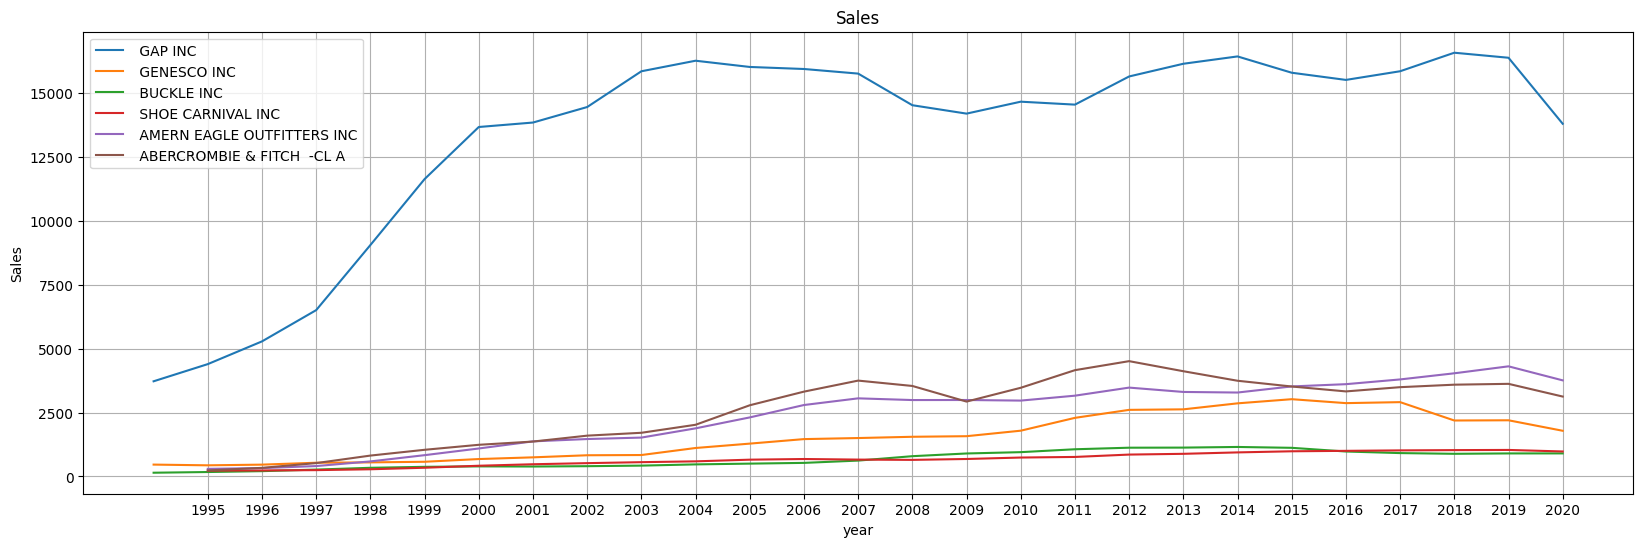

In [288]:
plt.figure(figsize=(20, 6))

for gvkey, group_df in similarity.groupby('gvkey'):
    company_name = group_df['conm'].iloc[0]
    plt.plot(group_df['fyear'],group_df['sale'], label = f' {company_name}')

plt.xticks(group_df['fyear'])
plt.grid(True)
plt.xlabel('year')
plt.ylabel('Sales')
plt.title('Sales')
plt.legend()
plt.savefig('Sales_linechart.png')
plt.show()

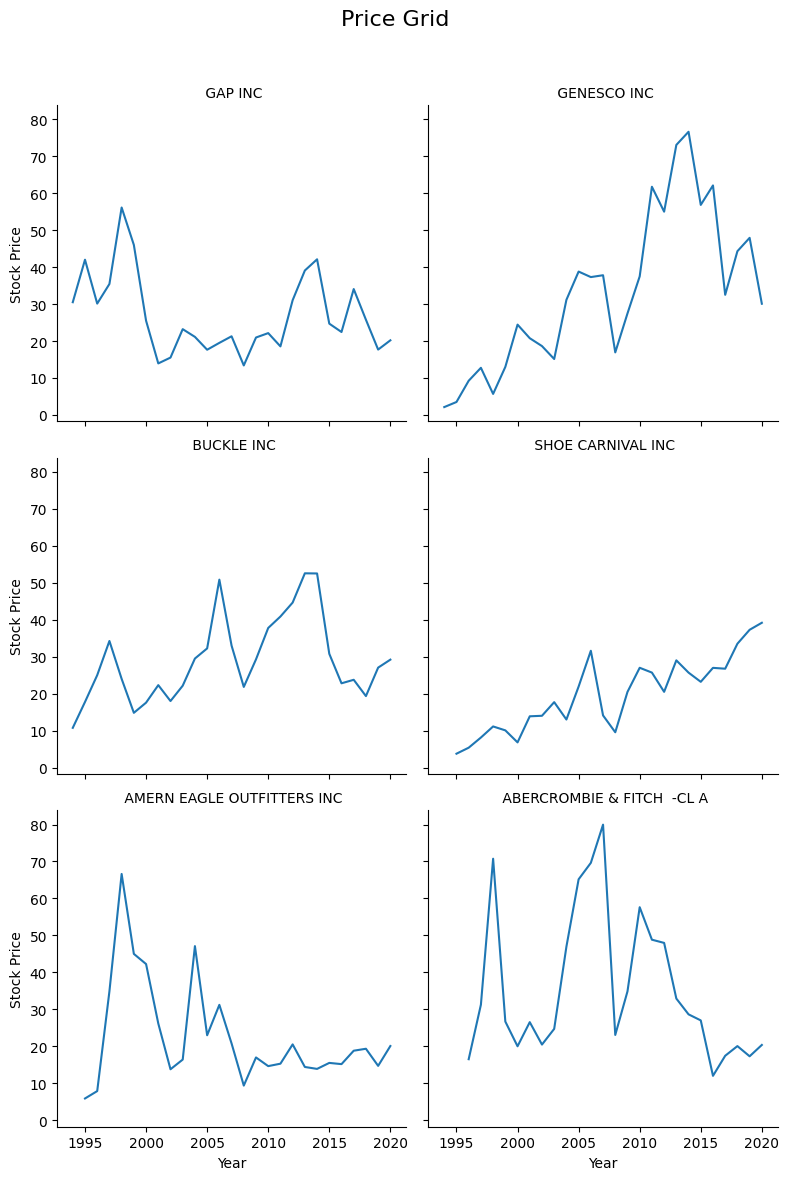

In [287]:
g = sns.FacetGrid(data=similarity, col='conm', col_wrap=2, height=4)

# Map line plots to the FacetGrid
g.map(plt.plot, 'fyear', 'prcc_c')

# Set labels and titles
g.set_axis_labels('Year', 'Stock Price')
g.set_titles(col_template=' {col_name}')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Price Grid', fontsize=16)
plt.savefig('facetgrid.png')